# 3.4 贝叶斯模型的比较

我们从贝叶斯的角度来探讨模型选择的问题。

假设我们希望比较 $L$ 个模型 $\{\mathcal M_i\}, i=1,\dots,L$。

这里不同的模型表示在同一个观测集 $\mathcal D$ 下的不同概率分布。

假设第 $i$ 个模型的先验分布为 $p(\mathcal M_i)$，则其后验分布为：

$$
p(\mathcal M_i|\mathcal D) \propto p(\mathcal D|\mathcal M_i)p(\mathcal M_i)
$$

如果这 $L$ 个模型的先验分布是一样的，那么对于后验分布，我们只需要关心
`model evidence` 这个量： $p(\mathcal D|\mathcal M_i)$（它也可以看成模型的边际似然函数，因为它可以看成是模型空间的一个似然）。通常，我们把不同模型的 `model evidence` 的比值 $\frac{p(\mathcal D|\mathcal M_i)}{p(\mathcal D|\mathcal M_j)}$ 叫做 `Bayes factor`。

当我们知道不同模型的后验分布后，预测值的分布可以写成它们的混合（模型平均）：

$$
p(t|\mathbf x,\mathcal D) = \sum_{i=1}^L p(t|\mathbf x,\mathcal M_i, \mathcal D) p(\mathcal M_i|\mathcal D)
$$

在这种情况下，如果两个模型分别是 $t=a, t=b$ 处的单峰模型，那么它们的混合是一个 $t=a, t=b$ 的双峰模型。

对这个混合分布的一个简单近似是使用单一的最好模型，这种方法叫做模型选择（`model select`）。

给定模型的一组参数 $\bf w$，其 `model evidence` 为：

$$
p(\mathcal D|\mathcal M_i) = \int p(\mathcal D|\mathbf w, \mathcal M_i) p(\mathbf w|\mathcal M_i) d\mathbf w
$$

Bayes 理论给出

$$
p(\mathbf w | \mathcal D, \mathcal M_i) = \frac{p(\mathcal D|\mathbf w, \mathcal M_i) p(\mathbf w|\mathcal M_i)}{p(\mathcal D|\mathcal M_i)}
$$

为了简单，我们考虑单参数 $w$ 的模型，参数的后验分布$p(w|\mathcal D)$正比于 $p(\mathcal D|w)p(w)$，这里我们忽略了 $\mathcal M_i$，让表示更加简洁。

假设后验分布在 $w_{MAP}$ 附近是一个锐峰，宽度为 $\Delta_{posterior}$，我们可以将后验分布的积分近似为峰值乘以宽度，更进一步，我们假设先验分布是均匀的，即 $p(w)=1/\Delta w_{prior}$，那么我们可以这样近似 `model evidence` $p(\mathcal D)$ 如下：

$$
p(\mathcal D)=\int p(\mathcal D|w)p(w)dw \simeq p(D|w_{WAP}) \frac{\Delta w_{posterior}}{\Delta w_{prior}}
$$

取对数 

$$
\ln p(\mathcal D) \simeq \ln p(D|w_{WAP}) + \ln \left( \frac{\Delta w_{posterior}}{\Delta w_{prior}} \right)
$$

近似的示意图如下。

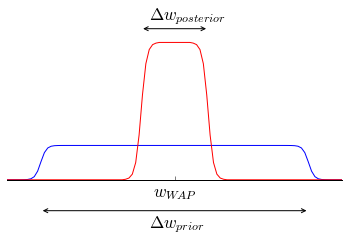

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

_, ax = plt.subplots()

xx = np.linspace(-1, 1, 100)
yy_1 = np.ones_like(xx) * 2

yy_1[:20] = 1 + np.tanh((xx[:20] + 0.8) * 30)
yy_1[-20:] = 1 - np.tanh((xx[-20:] - 0.8) * 30)

yy_2 = np.zeros_like(xx)

yy_2[35:45] = 4 * (1 + np.tanh((xx[35:45] + 0.2) * 30))
yy_2[-45:-35] = 4 * (1 - np.tanh((xx[-45:-35] - 0.2) * 30))

yy_2[45:-45] = 4 * 2

ax.plot(xx, yy_1, 'b', xx, yy_2, 'r')
ax.set_ylim([-3, 10])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.set_yticks([])
ax.set_xticks([0])
ax.set_xticklabels(['$w_{WAP}$'], fontsize="xx-large")


ax.annotate("",
            xy=(-0.8, -1.8), xycoords='data',
            xytext=(0.8, -1.8), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), 
            )

ax.text(-0.15, -2.8, r"$\Delta w_{prior}$", fontsize="xx-large")

ax.annotate("",
            xy=(-0.2, 8.8), xycoords='data',
            xytext=(0.2, 8.8), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), 
            )

ax.text(-0.15, 9.3, r"$\Delta w_{posterior}$", fontsize="xx-large")


plt.show()

对于多参数变量，设参数个数为 $M$，并假设所有的参数有相同的 $\frac{\Delta w_{posterior}}{\Delta w_{prior}}$，我们有

$$
\ln p(\mathcal D) \simeq \ln p(D|\mathbf w_{WAP}) + M \ln \left( \frac{\Delta w_{posterior}}{\Delta w_{prior}} \right)
$$

当我们增加模型复杂度时，上式的第一项通常会减小，因为通常复制的模型对数据的拟合更好，但是第二项会随着 $M$ 的增大而增大；而我们的目标是最大化模型的 `model evidence`，因此要对这两项做一个权衡。